# Capstone Final Poject
# Use ResNet50 Model and Sequential for Object Detection and Person Emotion Detection

# Training

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download Dataset from Drive
!cp '/content/drive/MyDrive/objectsforblind/object_detection.zip' object_detection.zip

In [ ]:
# List 
!ls

drive  object_detection.zip  sample_data


In [ ]:
# Unzip File
from zipfile import ZipFile
file_name = "object_detection.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
# Import Necessary Libraries
import numpy as np
import cv2
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot as plt

In [ ]:
# Define Train and Test Path
train_dir = '/content/object_detection/train'
val_dir = '/content/object_detection/test'

In [ ]:
# Train and Test Generator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224,224),
        batch_size=64,
        color_mode="rgb",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224,224),
        batch_size=64,
        color_mode="rgb",
        class_mode='categorical')

Found 6873 images belonging to 35 classes.
Found 1707 images belonging to 35 classes.


In [ ]:
# Download ResNet50 Pretrained Model
base_model = tf.keras.applications.ResNet50(input_shape=(224,224,3),include_top=False,weights="imagenet")

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# Sequential Model and Add ResNet50 Model
obj_model = Sequential()
obj_model.add(base_model)
obj_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3), data_format='channels_last'))
obj_model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
obj_model.add(MaxPooling2D(pool_size=(2, 2)))
obj_model.add(Dropout(0.25))
obj_model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
obj_model.add(MaxPooling2D(pool_size=(2, 2), padding='same',))
obj_model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
obj_model.add(MaxPooling2D(pool_size=(2, 2), padding='same',))
obj_model.add(Dropout(0.25))
obj_model.add(Flatten())
obj_model.add(Dense(1024, activation='relu'))
obj_model.add(Dropout(0.5))
obj_model.add(Dense(35, activation='softmax'))

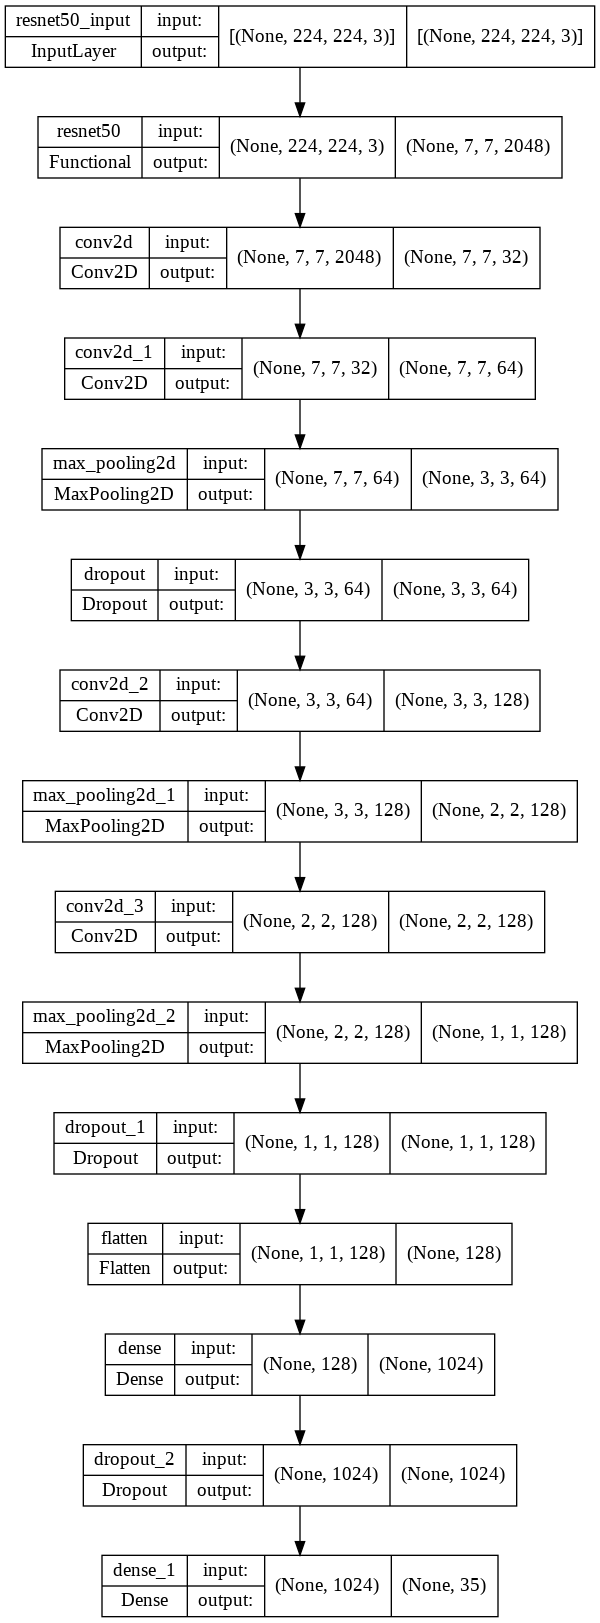

In [ ]:
# Show Model
plot_model(obj_model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Summary Model
obj_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 32)          589856    
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                        

In [ ]:
# Compile Model
obj_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# Fit Generation
obj_model_info = obj_model.fit_generator(
        train_generator,
        steps_per_epoch=6873 // 64,
        epochs=35,
        validation_data=validation_generator,
        validation_steps=1707 // 64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/35
  5/107 [>.............................] - ETA: 3:49 - loss: 0.6310 - accuracy: 0.0281

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


107/107 [==============================] - 440s 4s/step - loss: 0.1807 - accuracy: 0.0780 - val_loss: 0.1417 - val_accuracy: 0.0667
Epoch 2/35
107/107 [==============================] - 393s 4s/step - loss: 0.0823 - accuracy: 0.4437 - val_loss: 0.2451 - val_accuracy: 0.0823
Epoch 3/35
107/107 [==============================] - 383s 4s/step - loss: 0.0389 - accuracy: 0.7772 - val_loss: 0.2373 - val_accuracy: 0.1064
Epoch 4/35
107/107 [==============================] - 380s 4s/step - loss: 0.0194 - accuracy: 0.9116 - val_loss: 0.4179 - val_accuracy: 0.0571
Epoch 5/35
107/107 [==============================] - 382s 4s/step - loss: 0.0100 - accuracy: 0.9656 - val_loss: 0.5779 - val_accuracy: 0.1496
Epoch 6/35
107/107 [==============================] - 378s 4s/step - loss: 0.0060 - accuracy: 0.9825 - val_loss: 0.3195 - val_accuracy: 0.3798
Epoch 7/35
107/107 [==============================] - 378s 4s/step - loss: 0.0045 - accuracy: 0.9866 - val_loss: 0.1737 - val_accuracy: 0.6701
Epoch 8/35

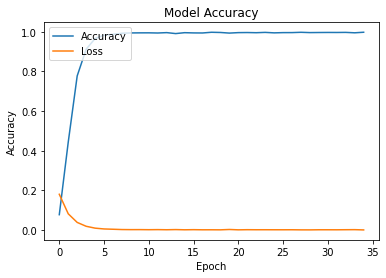

In [ ]:
# Line Graph for Accuracy and Loss
plt.plot(obj_model_info.history['accuracy'])
plt.plot(obj_model_info.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Accuracy","Loss"],loc='upper left')
plt.show()

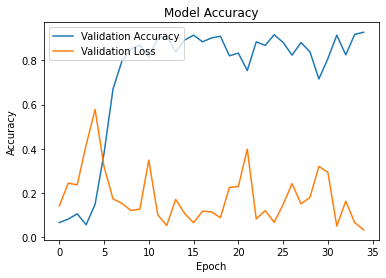

In [ ]:
# Line Graph for Validation Accuracy and Validation Loss
plt.plot(obj_model_info.history['val_accuracy'])
plt.plot(obj_model_info.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Validation Accuracy","Validation Loss"],loc='upper left')
plt.show()

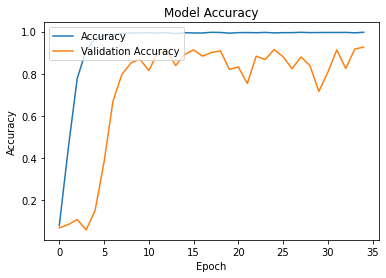

In [ ]:
# Line Graph for Accuracy and Validation Accuracy
plt.plot(obj_model_info.history['accuracy'])
plt.plot(obj_model_info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Accuracy","Validation Accuracy"],loc='upper left')
plt.show()

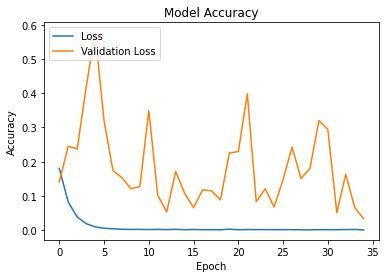

In [ ]:
# Line Graph for Loss and Validation Loss
plt.plot(obj_model_info.history['loss'])
plt.plot(obj_model_info.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Loss","Validation Loss"],loc='upper left')
plt.show()

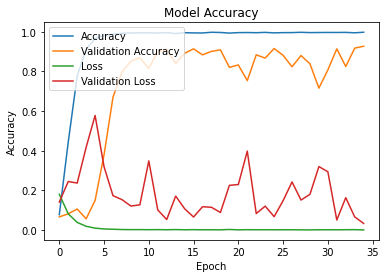

In [ ]:
# Line Graph for Accuracy, Loss, Validation Accuracy and Validation Loss
plt.plot(obj_model_info.history['accuracy'])
plt.plot(obj_model_info.history['val_accuracy'])
plt.plot(obj_model_info.history['loss'])
plt.plot(obj_model_info.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"],loc='upper left')
plt.show()

In [ ]:
#Saving the model
obj_model.save('object_detection_model.h5')

In [ ]:
#Saving the model weights
obj_model.save_weights('object_detect_model_weights.h5')

# Testing

In [ ]:
# Load Model
from keras.models import load_model
obj_model = load_model('object_detection_model.h5')

In [ ]:
# Install Library
!pip install pyttsx3
!pip install gTTS

In [ ]:
# Import Necessary Library 
import pandas as pd
import pyttsx3
from gtts import gTTS
from IPython.display import Audio
from gtts import gTTS
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define Objects
def obj_analysis(obj):
    objects = ('1 Taka','10 Taka','100 Taka','1000 Taka', '2 Taka','20 Taka', '5 Taka',  '50 Taka', '500 Taka', 'Person',  'bed', 'bicycle', 'bike', 'boat', 'bus','c-n-g', 'car', 'chair', 'desk', 'door', 'easy-bike', 'horse-cart', 'laptop', 'launch', 'leguna', 'lorry', 'mug', 'rickshaw', 'stair', 'television', 'thelagari', 'tractor', 'truck', 'van', 'window')
    a=objects[obj]
    print(a)
    tts = gTTS(a)
    tts.save('object_voice_output.wav')
    return a

5 Taka


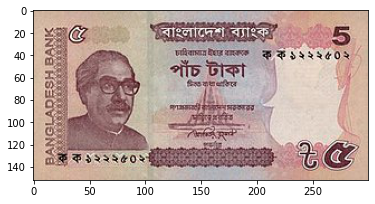

In [ ]:
# Prediction Function
file = 'test1.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="rgb", target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = obj_model.predict(x)
maxVal_Index = np.argmax(custom)

a=obj_analysis(maxVal_Index)

x = np.array(x, 'float32')
x = x.reshape([224, 672]);

plt.imshow(true_image)
plt.show()

In [ ]:
# Voice output
sound_file = 'object_voice_output1.wav'
Audio(sound_file, autoplay=True)

100 Taka


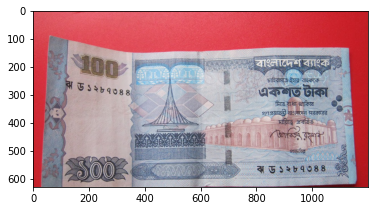

In [ ]:
# Prediction Function
file = 'test2.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="rgb", target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = obj_model.predict(x)
maxVal_Index = np.argmax(custom)

a=obj_analysis(maxVal_Index)

x = np.array(x, 'float32')
x = x.reshape([224, 672]);

plt.imshow(true_image)
plt.show()

In [ ]:
# Voice output
sound_file = 'object_voice_output2.wav'
Audio(sound_file, autoplay=True)

bicycle


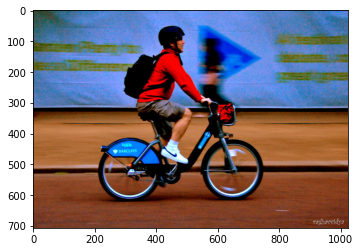

In [ ]:
# Prediction Function
file = 'test3.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="rgb", target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = obj_model.predict(x)
maxVal_Index = np.argmax(custom)

a=obj_analysis(maxVal_Index)

x = np.array(x, 'float32')
x = x.reshape([224, 672]);

plt.imshow(true_image)
plt.show()

In [ ]:
# Voice output
sound_file = 'object_voice_output3.wav'
Audio(sound_file, autoplay=True)

rickshaw


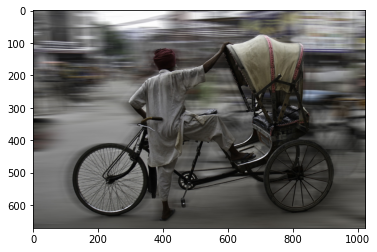

In [ ]:
# Prediction Function
file = 'test4.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="rgb", target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = obj_model.predict(x)
maxVal_Index = np.argmax(custom)

a=obj_analysis(maxVal_Index)

x = np.array(x, 'float32')
x = x.reshape([224, 672]);

plt.imshow(true_image)
plt.show()

In [ ]:
# Voice output
sound_file = 'object_voice_output4.wav'
Audio(sound_file, autoplay=True)

Person


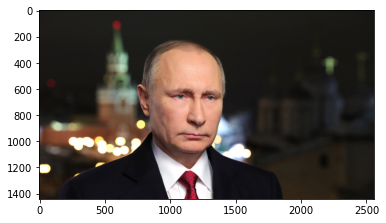

In [ ]:
# Prediction Function
file = 'test5.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="rgb", target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = obj_model.predict(x)
maxVal_Index = np.argmax(custom)

a=obj_analysis(maxVal_Index)

x = np.array(x, 'float32')
x = x.reshape([224, 672]);

plt.imshow(true_image)
plt.show()

In [ ]:
# Voice output
sound_file = 'object_voice_output5.wav'
Audio(sound_file, autoplay=True)

# Emotion Detection

# If detect any Person then our model detect his/her emotion

In [ ]:
# Download Trained Emotion Model from Drive
!cp '/content/drive/MyDrive/objectsforblind/final model/emotion_detection_model.h5' emotion_detection_model.h5

In [ ]:
# Download Haar Cascade Model from Drive
!cp '/content/drive/MyDrive/objectsforblind/final model/haarcascade_frontalface_alt.xml' haarcascade_frontalface_alt.xml

In [ ]:
# Load Model
from keras.models import load_model
emotion_model = load_model('emotion_detection_model.h5')

In [ ]:
# Import Necessary Libraries
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define Emotions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    a=objects[emotions]
    print(a)
    tts = gTTS(a)
    tts.save('emotion_voice_output.wav')

In [ ]:
def emotion_analysis_plt(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [ ]:
# Use Haar Cascade for Crop Image and Detect Emotion
def facecrop(image):  
    facedata = 'haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]
        
            cv2.imwrite('face_test5.jpg', sub_face)

    except Exception as e:
        print (e)

In [ ]:
# Prediction
def emotion_obj():

    if __name__ == '__main__':
        facecrop('test5.jpg')
    
    file = 'face_test5.jpg'
    true_image = image.load_img(file)
    img = image.load_img(file, color_mode="rgb", target_size=(48, 48))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    x /= 255

    custom1 = emotion_model.predict(x)
    maI = np.argmax(custom1)

    emotion_analysis(maI)

    emotion_analysis_plt(custom1[0])

    x = np.array(x, 'float32')
    x = x.reshape([48, 144]);


    plt.imshow(true_image)
    plt.show()

surprise


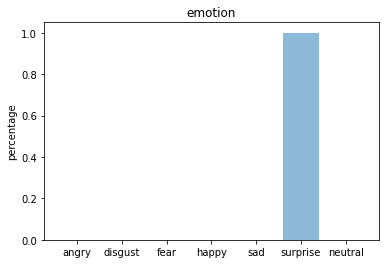

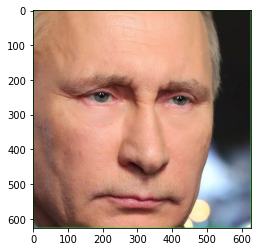

In [ ]:
#Check Person
if a=="Person":
  emotion_obj()
else:
  print("Not a Person")

In [ ]:
# Voice Output
sound_file = 'emotion_voice_output.wav'
Audio(sound_file, autoplay=True) 

# For webcam Image Capture

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
take_photo()